In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
# load data

MAX_WORDS = 10000
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=MAX_WORDS)

In [0]:
# examine data
# train_data is a list of lists; each list is a sequence of word index values
# train_labels is a list of class labels: 1 for a positive review, 0 for a negative review

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [0]:
# translate review into english

# get dict that converts words to integer index
# (keys are words and values are index integers)
word_index = imdb.get_word_index()
test_word = 'the'
print("WORD INDEX EXAMPLE:")
print("Word: {0} -> Index: {1}".format(test_word,word_index[test_word]))

# build reverse dict to convert integer index to word
# (keys are index integers and values are words)
reverse_word_lookup_list = [(value,word) for (word,value) in word_index.items()]
reverse_word_lookup_dict = dict(reverse_word_lookup_list)

# translate a list of integer indexes into a list of words
review_number = 14918
words_per_line = 15
review_words = [reverse_word_lookup_dict.get(i-3,'?') for i in train_data[review_number]]
print(" ")
print("REVIEW:")
for j in range(int(len(review_words)/words_per_line)):
  print(' '.join(review_words[j*words_per_line:(j+1)*words_per_line]))
  print(train_data[review_number][j*words_per_line:(j+1)*words_per_line])

print(' ')
# print sentiment
if train_labels[review_number] == 1:
  print("POSITIVE REVIEW")
else:
  print("NEGATIVE REVIEW")
  

WORD INDEX EXAMPLE:
Word: the -> Index: 1
 
REVIEW:
? wow the only people reviewing this positively are the carpenter ? i know a
[1, 1318, 4, 64, 84, 6695, 14, 5402, 26, 4, 3765, 2, 13, 124, 6]
lot of those the guys that'll watch john carpenter ? on celluloid and ? out
[176, 7, 148, 4, 493, 9543, 106, 308, 3765, 2, 23, 4065, 5, 2, 46]
a movie and ? it a ? of horror this movie is utter crap it
[6, 20, 5, 2, 12, 6, 2, 7, 189, 14, 20, 9, 2152, 595, 12]
looks and sounds like a porno good lord the soundtrack is awful and has sub
[272, 5, 934, 40, 6, 4522, 52, 1635, 4, 816, 9, 373, 5, 47, 1492]
par porn acting which is shocking because normally ron ? is really a very good
[2291, 1509, 116, 63, 9, 1621, 88, 1760, 2709, 2, 9, 66, 6, 55, 52]
actor i honestly have no idea what carpenter was thinking when making this most likely
[284, 13, 1252, 28, 57, 326, 51, 3765, 16, 536, 54, 231, 14, 91, 1329]
? ? ? until somebody fed him and rolled him up into a ? for
[2, 2, 2, 366, 1843, 5070, 90, 5, 4985,

In [0]:
# vectorize data and labels
# there are two approaches; they give approximately the same results

# alternative 1: vectorize with presense/absence of word (1 or 0 only)

#def vectorize_sequences(sequences,dimensions=MAX_WORDS):
#  results = np.zeros(shape=(len(sequences),dimensions))
#  for i, sequence in enumerate(sequences):
#    results[i,sequence] = 1
#  return results

# alternative 2: histogram words (count number of each word)

def vectorize_sequences(sequences,dimensions=MAX_WORDS):
  results = np.zeros(shape=(len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    for idx in sequence:
      results[i,idx] += 1
  return results

# data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("Vectorized {0} train and {1} test sequences.".format(len(x_train),len(x_test)))

# labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("Converted {0} train and {1} test labels to arrays.".format(len(y_train),len(y_test)))


Vectorized 25000 train and 25000 test sequences.
Converted 25000 train and 25000 test labels to arrays.


In [0]:
# examine vectorized data and labels
print(x_train[0][0:16])
print(y_train[0])

[ 0.  1.  6.  0. 15.  9.  3.  2.  3.  1.  0.  0.  6.  3.  3.  4.]
1.0


In [0]:
# define model

model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(MAX_WORDS,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model

model.compile(optimizer=optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
# fit model

history = model.fit(x_train, y_train, batch_size=512, validation_split=0.1, epochs=4)

Train on 22500 samples, validate on 2500 samples
Epoch 1/4
22500/22500 [==============================] - 3s 116us/step - loss: 0.5048 - acc: 0.7693 - val_loss: 0.3447 - val_acc: 0.8764
Epoch 2/4
22500/22500 [==============================] - 2s 104us/step - loss: 0.2626 - acc: 0.9079 - val_loss: 0.2919 - val_acc: 0.8900
Epoch 3/4
22500/22500 [==============================] - 3s 120us/step - loss: 0.1865 - acc: 0.9373 - val_loss: 0.2929 - val_acc: 0.8920
Epoch 4/4
22500/22500 [==============================] - 2s 105us/step - loss: 0.1441 - acc: 0.9531 - val_loss: 0.3117 - val_acc: 0.8940


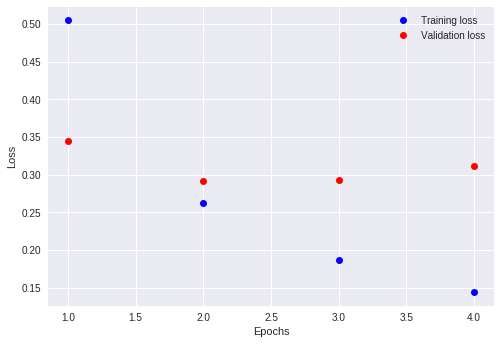

In [0]:
# plot training loss

epochs = range(1,len(history.history['loss'])+1)
plt.plot(epochs,history.history['loss'],'bo',label='Training loss')
plt.plot(epochs,history.history['val_loss'],'ro',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# evaluate model
results = model.evaluate(x_test,y_test)
print(model.metrics_names)
print(results)

25000/25000 [==============================] - 2s 67us/step
['loss', 'acc']
[0.31281926856517794, 0.88116]


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 airplane01.jpg   sample4.png
 airplane02.jpg   sample7.png
 airplane03.jpg  'STIA415_Class10 (1).ipynb'
 bird01.jpg	  STIA415_Class10.ipynb
 bird02.jpg	  STIA415_Class10_solution.ipynb
 bird03.jpg	  STIA415_Class10_trained_model.h5
 dog01.jpg	  STIA415_Class12.ipynb
 dog02.jpg	  STIA415_Class12_solution.ipynb
 dog03.jpg	  the_martian_review_01.gdoc
 sample2a.png	  the_martian_review_01.txt
 sample2b.png	  truck01.jpg
 sample2c.png	  truck02.jpg
 sample2d.png	  truck03.jpg


In [0]:
# test model on random review

FILENAME = "/content/drive/My Drive/Colab Notebooks/the_martian_review_01.txt"
with open(FILENAME,'r') as f:
  review_text = f.readlines()
print(review_text[0])


﻿Proving conclusively that it really is all about the writing, Ridley Scott’s most enjoyable film in years reassures us that the creakiness of Prometheus, the cack-handed contrivance of The Counsellor and the sheer stodginess of Exodus: Gods and Kings were genetically rooted in their respective screenplays. Scott may not have the best eye for a decent script (he thought A Good Year read like a charming Russell Crowe vehicle), but when the right words are on the page he can visualise them like no other. From the creative back and forth of Hampton Fancher and David Peoples on Blade Runner, through the genius of Callie Khouri’s Thelma and Louise screenplay, to this terrifically crowd-pleasing adaptation of Andy Weir’s book by The Cabin in the Woods creator Drew Goddard, Scott’s greatest debt has always been to his writers. The director may have earned a justified reputation as a “world-building visionary”, but his audiences always demand a good story and that’s exactly what they’ve got he

In [0]:
# build sequence of word indices
# note: we have to add 3 to the index from word_index
# because the training data (from imdb.load_data()) has 
# this offset in index values (see cells above)

bag_of_words = []
for line in review_text:
  word_list = line.split(' ')
  for word in word_list:
    if word in word_index.keys():
      idx = word_index[word] + 3
      if idx <= MAX_WORDS:
        bag_of_words.append(idx)
      print("{0}: {1}".format(word,idx))
print("Found {0} unique words.".format(len(bag_of_words)))


conclusively: 56542
that: 15
it: 12
really: 66
is: 9
all: 32
about: 44
the: 4
most: 91
enjoyable: 737
film: 22
in: 11
years: 153
reassures: 45200
us: 178
that: 15
the: 4
of: 7
the: 4
contrivance: 17408
of: 7
and: 5
the: 4
sheer: 2099
of: 7
and: 5
were: 71
genetically: 15930
rooted: 10161
in: 11
their: 68
respective: 5489
may: 203
not: 24
have: 28
the: 4
best: 118
eye: 744
for: 18
a: 6
decent: 542
script: 229
thought: 197
read: 332
like: 40
a: 6
charming: 1220
but: 21
when: 54
the: 4
right: 208
words: 715
are: 26
on: 23
the: 4
page: 1511
he: 29
can: 70
visualise: 81524
them: 98
like: 40
no: 57
the: 4
creative: 1518
back: 145
and: 5
forth: 2589
of: 7
and: 5
on: 23
through: 143
the: 4
genius: 1262
of: 7
and: 5
to: 8
this: 14
terrifically: 12514
adaptation: 1253
of: 7
book: 274
by: 34
in: 11
the: 4
creator: 4868
greatest: 833
debt: 6557
has: 47
always: 210
been: 77
to: 8
his: 27
director: 167
may: 203
have: 28
earned: 4300
a: 6
justified: 6017
reputation: 2577
as: 17
a: 6
but: 21
his: 27
a

In [0]:
# vectorize sequence to make bag-of-words and predict

bag_of_words_vectorized = vectorize_sequences([bag_of_words])
prediction_prob = model.predict_proba(bag_of_words_vectorized)
if prediction_prob[0][0] > 0.5:
  print("POSITIVE REVIEW")
else:
  print("NEGATIVE REIVEW")
print("Prediction: {0}".format(prediction_prob[0][0]))



POSITIVE REVIEW
Prediction: 0.9999823570251465
